### Based
https://www.kaggle.com/code/ichigoe/bidirectionlstm-transformer-cnn   
https://www.kaggle.com/code/umar47/detect-ai-eda-tensorflow-0-90?scriptVersionId=152526428  

In [ ]:
# ─── 1. 設定 Kaggle 認證 ───
# import os
# os.environ['KAGGLE_USERNAME'] = "vert95123"
# os.environ['KAGGLE_KEY'] = "1d6a32ae179c536c7d99bb3bc5e37c29"

import kagglehub
# kagglehub.login()

In [ ]:
# # ─── 2. 下載所有需要的資料集 ───
# llm_detect_ai_generated_text_path = kagglehub.competition_download('llm-detect-ai-generated-text')
# alejopaullier_daigt_external_dataset_path = kagglehub.dataset_download('alejopaullier/daigt-external-dataset')
# narsil_daigt_misc_path = kagglehub.dataset_download('narsil/daigt-misc')
# darraghdog_hello_claude_1000_essays_from_anthropic_path = kagglehub.dataset_download('darraghdog/hello-claude-1000-essays-from-anthropic')
# thedrcat_daigt_proper_train_dataset_path = kagglehub.dataset_download('thedrcat/daigt-proper-train-dataset')
# kingki19_llm_generated_essay_using_palm_from_google_gen_ai_path = kagglehub.dataset_download('kingki19/llm-generated-essay-using-palm-from-google-gen-ai')
# carlmcbrideellis_llm_7_prompt_training_dataset_path = kagglehub.dataset_download('carlmcbrideellis/llm-7-prompt-training-dataset')
# thedrcat_daigt_v2_train_dataset_path = kagglehub.dataset_download('thedrcat/daigt-v2-train-dataset')
# jdragonxherrera_augmented_data_for_llm_detect_ai_generated_text_path = kagglehub.dataset_download('jdragonxherrera/augmented-data-for-llm-detect-ai-generated-text')
# nbroad_daigt_data_llama_70b_and_falcon180b_path = kagglehub.dataset_download('nbroad/daigt-data-llama-70b-and-falcon180b')
# carlmcbrideellis_llm_mistral_7b_instruct_texts_path = kagglehub.dataset_download('carlmcbrideellis/llm-mistral-7b-instruct-texts')
# datafan07_daigt_gemini_pro_8_5k_essays_path = kagglehub.dataset_download('datafan07/daigt-gemini-pro-8-5k-essays')
# dardodel_4k_mixtral87b_crafted_essays_for_detect_ai_comp_path = kagglehub.dataset_download('dardodel/4k-mixtral87b-crafted-essays-for-detect-ai-comp')
# # 新增：7-se7en-prompts 資料集
# Sentence_Transformers_from_Huggingface = kagglehub.dataset_download('erenakbulut/sentence-transformers')
# DAIGT_External_Train_Dataset = kagglehub.dataset_download("thedrcat/daigt-external-train-dataset")

# print('Data source import complete.')

In [ ]:
# ─── 3. 基本套件匯入 ───
import random
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import string
import tensorflow_text as tf_text
import matplotlib.pyplot as plt

2025-06-04 08:13:20.962284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749024801.181775      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749024801.244611      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# llm_detect_ai_generated_text_path = kagglehub.competition_download('llm-detect-ai-generated-text')
# alejopaullier_daigt_external_dataset_path = kagglehub.dataset_download('alejopaullier/daigt-external-dataset')

# # Print the path to the downloaded dataset to verify it's correct
# print(alejopaullier_daigt_external_dataset_path)

# # Update the path in pd.read_csv to use the downloaded path
# extra_train = pd.read_csv(alejopaullier_daigt_external_dataset_path + "/daigt_external_dataset.csv")

In [ ]:
# extra_train = pd.read_csv("/kaggle/input/daigt-external-dataset/daigt_external_dataset.csv")
# test = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')

In [ ]:
train = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_essays.csv')
extra_train = pd.read_csv("/kaggle/input/daigt-external-dataset/daigt_external_dataset.csv")
extra_train_new = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_01.csv")
test = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')
train_prompts = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv')

In [ ]:
#
extra_train_1 = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_01.csv").rename(columns = {'label': 'generated'}).drop(['source', 'fold'], axis=1)
extra_train_2 = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_02.csv").rename(columns = {'label': 'generated'}).drop(['essay_id','source', 'prompt', 'fold'], axis=1)
extra_train_3 = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_03.csv").rename(columns = {'label': 'generated'}).drop(['essay_id','source', 'prompt', 'fold'], axis=1)
extra_train_4 = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv").rename(columns = {'label': 'generated'}).drop(['essay_id','source', 'prompt', 'fold'], axis=1)
extra_train_5 = pd.read_csv("/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv").rename(columns = {'label': 'generated'}).drop(['prompt_name','source', 'RDizzl3_seven'], axis=1)
extra_train_6 = pd.read_csv("/kaggle/input/llm-7-prompt-training-dataset/train_essays_7_prompts.csv").rename(columns = {'label': 'generated'})
extra_train_7 = pd.read_csv("/kaggle/input/llm-7-prompt-training-dataset/train_essays_7_prompts_v2.csv").rename(columns = {'label': 'generated'})
extra_train_8 = pd.read_csv("/kaggle/input/llm-7-prompt-training-dataset/train_essays_RDizzl3_seven_v1.csv").rename(columns = {'label': 'generated'})
extra_train_9 = pd.read_csv("/kaggle/input/llm-7-prompt-training-dataset/train_essays_RDizzl3_seven_v2.csv").rename(columns = {'label': 'generated'})
extra_train_10 = pd.read_csv("/kaggle/input/augmented-data-for-llm-detect-ai-generated-text/final_test.csv").rename(columns = {'label': 'generated'})
extra_train_11 = pd.read_csv("/kaggle/input/augmented-data-for-llm-detect-ai-generated-text/final_train.csv").rename(columns = {'label': 'generated'})
extra_train_12 = pd.read_csv("/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv")[['text', 'label']].rename(columns = {'label': 'generated'})

extra_train_new = pd.concat([extra_train_1, extra_train_2,
                             extra_train_3, extra_train_4,
                             extra_train_5, extra_train_6,
                             extra_train_7, extra_train_8,
                             extra_train_9, extra_train_10,
                             extra_train_11,extra_train_12], axis=0)


extra_train_new = pd.concat([extra_train_1, extra_train_2],axis=0)

In [ ]:
extra_train_1 = pd.read_csv("/kaggle/input/llm-mistral-7b-instruct-texts/Mistral7B_CME_v7.csv").drop(['prompt_id','prompt_name'], axis=1)
extra_train_2 = pd.read_csv("/kaggle/input/hello-claude-1000-essays-from-anthropic/persuade15_claude_instant1.csv").drop(['prompt_id','essay_title'],axis=1).rename(columns = {'essay_text': 'text'})
extra_train_2['generated'] = 1
extra_train_3 = pd.read_csv("/kaggle/input/daigt-data-llama-70b-and-falcon180b/llama_falcon_v3.csv").drop(['prompt_name','model'], axis=1)
extra_train_4 = pd.read_csv("/kaggle/input/llm-generated-essay-using-palm-from-google-gen-ai/LLM_generated_essay_PaLM.csv").drop(['id','prompt_id'], axis=1)

extra_train_5 = pd.read_csv("/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv").rename(columns = {'label': 'generated'}).drop(['prompt_name','source', 'RDizzl3_seven'], axis=1)

extra_train_5 = extra_train_5[extra_train_5['generated'] == 0]
extra_train_5 = extra_train_5.sample(n=18149)

extra_train_6 = pd.read_csv("/kaggle/input/4k-mixtral87b-crafted-essays-for-detect-ai-comp/Mixtral8x7b_4k_essays_for_DetectAIGeneratedTextCompetition.csv").rename(columns = {'AI_Essay': 'text'}).drop(['model_Raw_output','student_id','prompt_id','index'], axis=1)
extra_train_6['generated'] = 1

In [ ]:
extra_train_new = pd.concat([extra_train_1, extra_train_2,
                             extra_train_3, extra_train_4,
                             extra_train_5, extra_train_6,], axis=0)

In [ ]:
# extra_train_student_generated = extra_train[['text']]
# extra_train_student_generated['generated'] = 0
# extra_train_ai_generated = extra_train[['source_text']].rename(columns = {'source_text':'text'})
# extra_train_ai_generated['generated'] = 1
# extra_train_nf = pd.concat([extra_train_student_generated, extra_train_ai_generated, extra_train_new], axis=0)
# extra_train_f = extra_train_nf.drop_duplicates(subset=['text'], keep='first').reset_index(drop=True)
# print(f"最終資料筆數：{len(extra_train_f)}")
# extra_train_f
extra_train_student_generated = extra_train[['text']]
extra_train_student_generated['generated'] = 0

extra_train_ai_generated = extra_train[['source_text']].rename(columns = {'source_text':'text'})
extra_train_ai_generated['generated'] = 1

extra_train_f = pd.concat([extra_train_student_generated, extra_train_ai_generated, extra_train_new], axis=0)
#extra_train_f = pd.concat([extra_train_student_generated, extra_train_ai_generated], axis=0)
extra_train_f

/tmp/ipykernel_19/1439605253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extra_train_student_generated['generated'] = 0


,text,generated
0,Some schools in United States ofter classes fr...,0.0
1,"Four-day work week, a remarkable idea to conse...",0.0
2,Students and their families should consider an...,0.0
3,Agree you will never grow if something beyond ...,0.0
4,I think our character traits are formed by inf...,0.0
...,...,...
3860,"Dear Senator,\n\nHave you ever wondered why th...",1.0
3861,There are many reasons to consider limiting ca...,1.0
3862,"Dear State Senator,\n\nI'm writing to argue in...",1.0
3863,As commuters navigate congested roads and inha...,1.0


In [ ]:
train_final = extra_train_f
train_final

,text,generated
0,Some schools in United States ofter classes fr...,0.0
1,"Four-day work week, a remarkable idea to conse...",0.0
2,Students and their families should consider an...,0.0
3,Agree you will never grow if something beyond ...,0.0
4,I think our character traits are formed by inf...,0.0
...,...,...
3860,"Dear Senator,\n\nHave you ever wondered why th...",1.0
3861,There are many reasons to consider limiting ca...,1.0
3862,"Dear State Senator,\n\nI'm writing to argue in...",1.0
3863,As commuters navigate congested roads and inha...,1.0


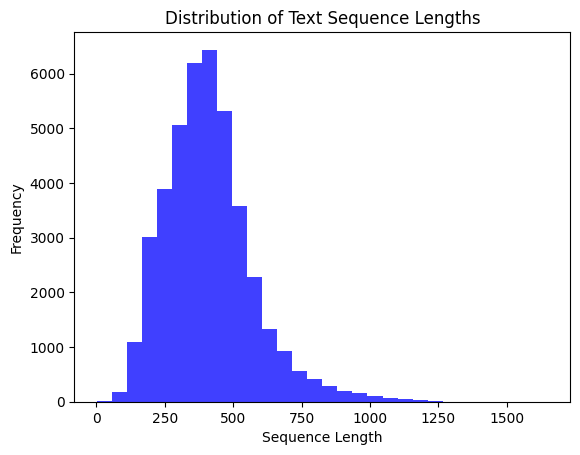

In [ ]:
# ─── 8. 簡單視覺化：文字長度分佈 ───
sequence_lengths = train_final['text'].apply(lambda x: len(x.split()))
plt.hist(sequence_lengths, bins=30, alpha=0.75, color='blue')
plt.title('Distribution of Text Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(train_final['generated'].value_counts())

generated
0.0    20570
1.0    20570
Name: count, dtype: int64


In [ ]:
train_df, val_df = train_test_split(train_final, test_size=0.3, random_state=222)

batch_size = 32

raw_train_ds = tf.data.Dataset.from_tensor_slices(
    (train_df['text'].values, train_df['generated'].values)
).batch(batch_size)

raw_val_ds = tf.data.Dataset.from_tensor_slices(
    (val_df['text'].values, val_df['generated'].values)
).batch(batch_size)

I0000 00:00:1749024856.851256      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749024856.851874      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
max_features = 75000
embedding_dim = 64
sequence_length = 512

def tf_lower_and_split_punct(text):
    text = tf_text.normalize_utf8(text, 'NFKD')
    text = tf.strings.lower(text)
    text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
    text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
    text = tf.strings.strip(text)
    text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
    return text


# Text vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_features,
    ngrams = (3,5),
    output_mode="int",
    output_sequence_length=sequence_length,
    pad_to_max_tokens=True
)

text_ds = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)#一維文字陣列轉二維
    return vectorize_layer(text), label

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)

In [ ]:
vocab = vectorize_layer.get_vocabulary()
print(vocab[:20])  # 前 20 個最常見的詞


['', '[UNK]', 'the electoral college', '. however ,', '. in conclusion', 'limiting car usage', 'in conclusion ,', ', the electoral', 'electoral college is', 'face on mars', 'one of the', 'the face on', 'the united states', 'for example ,', '. for example', 'electoral college system', ', such as', 'be able to', '. this is', ', it is']


In [ ]:
from tensorflow.keras.layers import TextVectorization, Embedding, Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras import Model, Input

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
inputs = Input(shape=(sequence_length,), dtype="int64")
x = Embedding(max_features, embedding_dim)(inputs)
x = Bidirectional(LSTM(32, return_sequences=True))(x)
transformer_block = TransformerBlock(embedding_dim, 2, 32)
x = transformer_block(x, training=False)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid", name="predictions")(x)

model = Model(inputs=inputs, outputs=predictions)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 512, 64)             │       4,800,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 512, 64)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block (TransformerBlock) │ (None, 512, 64)             │          37,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 169, 128)            │          57,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,936,609 (18.83 MB)

 Trainable params: 4,936,609 (18.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"])

epochs = 1
model.fit(train_ds, validation_data=val_ds, epochs=epochs)

I0000 00:00:1749024941.205910      62 cuda_dnn.cc:529] Loaded cuDNN version 90300


900/900 ━━━━━━━━━━━━━━━━━━━━ 63s 58ms/step - binary_accuracy: 0.8923 - loss: 0.2323 - val_binary_accuracy: 0.9871 - val_loss: 0.0342


In [ ]:
# test_text = test['text'].values
# vectorized_test_text = vectorize_layer(test_text)
# predictions = model.predict(vectorized_test_text)
# test['generated'] = predictions
# print(test[['text', 'generated']])

In [ ]:
# test[['id', 'generated']].set_index('id').to_csv("submission.csv")
# # test[['id', 'generated']].to_csv("submission.csv", index=false)

In [ ]:
# sample_sub = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv")

In [ ]:
# sample_sub["generated"] = predictions.squeeze()   # 或 predictions[:, 0]

In [ ]:
# sample_sub.to_csv("submission.csv", index=False)

In [ ]:
# print(sample_sub.head())

In [ ]:
# ================================
# 0. 載入套件
# ================================
import gc, os, random, numpy as np, pandas as pd, tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack
from sklearn.metrics import roc_auc_score

# ================================
# 1. 讀資料（沿用你之前整理好的 train_final / test）
# ================================
# train_final: 兩欄 ['text', 'generated'] ；test: 官方 test_essays.csv
# 這裡直接沿用你程式上方已經讀好的 train_final, test
train_texts = train_final['text'].tolist()
y           = train_final['generated'].values
test_texts  = test['text'].tolist()

# cut 30% 做驗證集
train_txt, val_txt, y_train, y_val = train_test_split(
    train_texts, y, test_size=0.3, random_state=222, stratify=y
)

# ================================
# 2. 建立「詞級 + 字級」TF-IDF
# ================================
# (1) 詞 unigram + bigram
word_vec = TfidfVectorizer(
    analyzer='word', ngram_range=(1, 2),
    max_features=10000,  # 自行調整
    min_df=2, strip_accents='unicode'
)

# (2) 字 trigram～5-gram
char_vec = TfidfVectorizer(
    analyzer='char', ngram_range=(3, 5),
    max_features=5000,   # 自行調整
    strip_accents='unicode'
)

# 擬合詞向量器
X_train_word = word_vec.fit_transform(train_txt)
X_val_word   = word_vec.transform(val_txt)
X_test_word  = word_vec.transform(test_texts)

# 擬合字向量器
X_train_char = char_vec.fit_transform(train_txt)
X_val_char   = char_vec.transform(val_txt)
X_test_char  = char_vec.transform(test_texts)

# 合併兩組特徵
X_train_tfidf = hstack([X_train_word, X_train_char])
X_val_tfidf   = hstack([X_val_word,   X_val_char])
X_test_tfidf  = hstack([X_test_word,  X_test_char])

# ================================
# 3. 訓練 TF-IDF + Logistic Regression
# ================================
lr_clf = LogisticRegression(
    C=2.0, max_iter=3000, n_jobs=-1, solver='lbfgs'
)
lr_clf.fit(X_train_tfidf, y_train)

# 取得驗證集 / 測試集 機率
lr_val_proba  = lr_clf.predict_proba(X_val_tfidf)[:, 1]
lr_test_proba = lr_clf.predict_proba(X_test_tfidf)[:, 1]

print('LR 验证 AUC =', roc_auc_score(y_val, lr_val_proba))

# ================================
# 4. 你的 Transformer+LSTM 深度模型
# ================================
# ► 假設你已經照原本程式編譯好 `model`
#    並在 train_ds 上訓練完成。
#    這裡直接對 val / test 做預測：

def texts_to_tensor(text_list):
    """把原始文字轉成模型需要的 tensor（沿用你的 vectorize_layer）"""
    return vectorize_layer(np.array(text_list))

deep_val_proba = model.predict(
    texts_to_tensor(val_txt), batch_size=256, verbose=0
).ravel()  # shape => (驗證樣本數,)

deep_test_proba = model.predict(
    texts_to_tensor(test_texts), batch_size=256, verbose=0
).ravel()

print('Deep 验证 AUC =', roc_auc_score(y_val, deep_val_proba))

# ================================
# 5. 加權平均融合
# ================================
# 這裡手動調一組權重；可用驗證 AUC 按比例分配或 grid search
w_deep = 0.7
w_lr   = 0.3

val_final_proba  = w_deep * deep_val_proba  + w_lr * lr_val_proba
test_final_proba = w_deep * deep_test_proba + w_lr * lr_test_proba

print('Ensemble 验证 AUC =', roc_auc_score(y_val, val_final_proba))

# ================================
# 6. 產生提交檔
# ================================
sub = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv')
sub['generated'] = test_final_proba.astype('float32')
sub.to_csv('submission.csv', index=False)
print('Saved submission.csv')


LR 验证 AUC = 0.999964286878151
Deep 验证 AUC = 0.9998833021224283
Ensemble 验证 AUC = 0.9999751583725962
Saved submission.csv


In [ ]:
# print(test[['id', 'generated']].set_index('id').head())

In [ ]:
# # 1️⃣ 讀官方 sample，保留正確順序
# sample_sub = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv")

# # 2️⃣ 取得預測（拉直成一維 & 確保 dtype）
# preds = model.predict(
#     vectorize_layer(test['text'].values),
#     batch_size=256,
#     verbose=0
# ).ravel().astype('float32')

# # 3️⃣ 組合 submission DataFrame
# submission = sample_sub.copy()
# submission['generated'] = preds

# # 4️⃣ ---------- 四道保險線 ----------
# assert submission.shape == sample_sub.shape, "列數不符！"
# assert list(submission.columns) == ['id', 'generated'], "欄位名稱不對！"
# assert submission['generated'].between(0, 1).all(), "預測值需落在 0~1！"
# assert submission['generated'].isna().sum() == 0, "有 NaN！"
# # ----------------------------------

# submission.to_csv("submissions.csv", index=False)
# print(submission.head())
